In [1]:
#!pip install pandas plotnine
# use any plotting library seaborn matplotlib,..........
from sklearn.neighbors import NearestNeighbors

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from plotnine import *
from sklearn import datasets
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

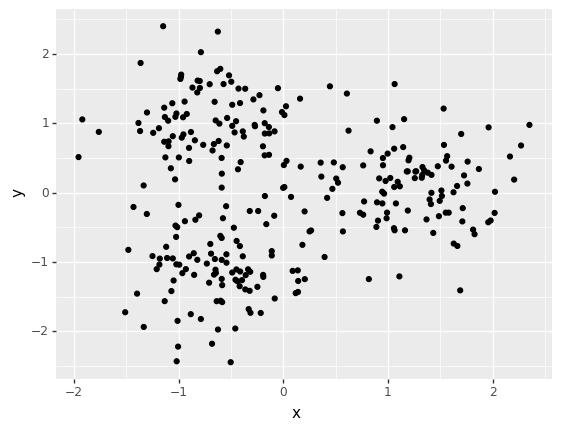

<ggplot: (173055426220)>

In [2]:
n_samples = 1500
dataset1 = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1=pd.DataFrame(dataset1[0])
dataset2 =datasets.make_moons(n_samples=n_samples, noise=.05)
dataset2=pd.DataFrame(dataset2[0])

dataset3 = datasets.make_blobs(n_samples=n_samples, random_state=8)
dataset3=pd.DataFrame(dataset3[0])

dataset4= np.random.rand(n_samples, 2), None
dataset4=pd.DataFrame(dataset4[0])

dataset5= pd.read_csv("dataset5.csv")
dataset6= pd.read_csv("dataset6.csv")
dataset7= pd.read_csv("dataset7.csv")
dataset8= pd.read_csv("dataset8.csv")
dataset9= pd.read_csv("dataset9.csv")
datasets=[dataset1]
z = StandardScaler()
dataset6[["x","y"]] = z.fit_transform(dataset6)
ggplot(dataset6, aes(x = "x", y = "y")) + geom_point() 


Text(0.5, 1.0, 'GaussianMixture')

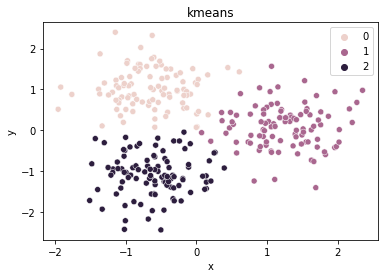

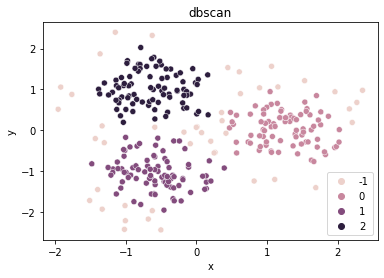

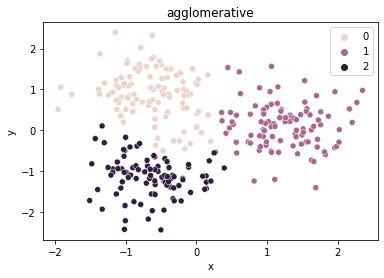

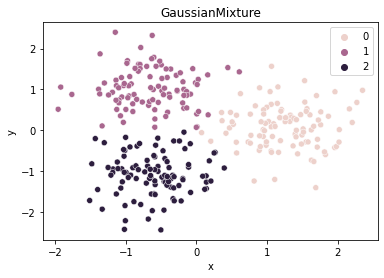

In [3]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(dataset6)
sns.scatterplot(x='x',y='y',data=dataset6,hue=kmeans.labels_)
plt.title('kmeans')

plt.figure()
dbscan=DBSCAN(eps=0.5,min_samples=10)
dbscan.fit(dataset6)
sns.scatterplot(x='x',y='y',data=dataset6,hue=dbscan.labels_)
plt.title('dbscan')


plt.figure()
agg=AgglomerativeClustering(n_clusters=3)
agg.fit(dataset6)
sns.scatterplot(x='x',y='y',data=dataset6,hue=agg.labels_)
plt.title('agglomerative')


plt.figure()
GM=GaussianMixture(3)
labels=GM.fit_predict(dataset6)
sns.scatterplot(x='x',y='y',data=dataset6,hue=labels)
plt.title('GaussianMixture')

In [4]:
s = silhouette_score(dataset6[['x', 'y']],kmeans.labels_, metric='euclidean')
print("the score of kmeans:",s)
s2 = silhouette_score(dataset6[['x', 'y']],dbscan.labels_, metric='euclidean')
print("the score of dbscane:",s2)
s3 = silhouette_score(dataset6[['x', 'y']],agg.labels_, metric='euclidean')
print("the score of hierch:",s3)
s4 = silhouette_score(dataset6[['x', 'y']],labels, metric='euclidean')
print("the score of hierch:",s4)

the score of kmeans: 0.55955877574645
the score of dbscane: 0.4586452627704865
the score of hierch: 0.5341877492082031
the score of hierch: 0.55955877574645


the best algorithm with this dataset  is the dbscan as it clustered the data into 3 clusters and detected the outliers

1) plot all dataset
2) use standard scalar
3) use K-means, agglomerative, dbscan
4) plot dataset after clustering
5) Evaluate inertia,silhouette score,..........

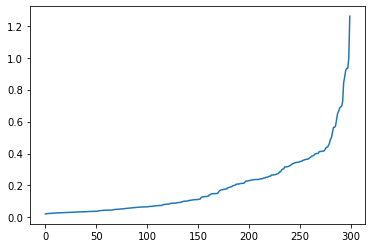

In [5]:
mins = 3
nn = NearestNeighbors(n_neighbors=4)

nn.fit(dataset9[["x", "y"]])

distances, neighbors = nn.kneighbors(dataset9[["x", "y"]])

distances = np.sort(distances[:, mins], axis = 0)
X=list(range(0,len(distances)))
plt.plot(X,distances)


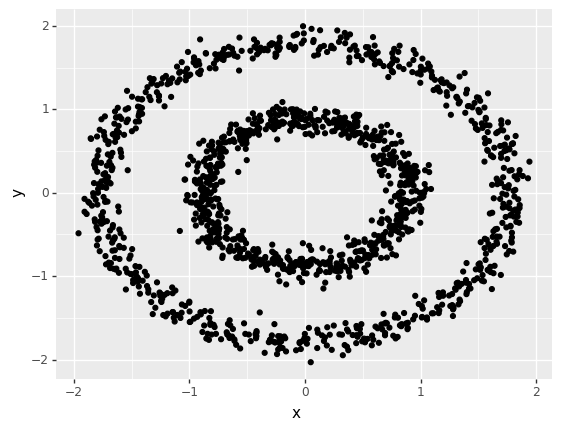

<ggplot: (173057506036)>

In [6]:
z = StandardScaler()
dataset1[["x","y"]] = z.fit_transform(dataset1)
ggplot(dataset1, aes(x = "x", y = "y")) + geom_point() 

Text(0.5, 1.0, 'GaussianMixture')

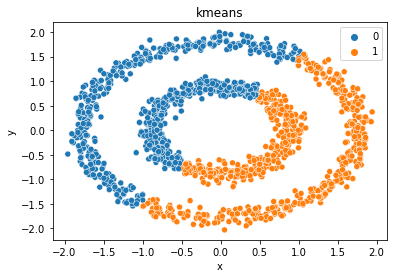

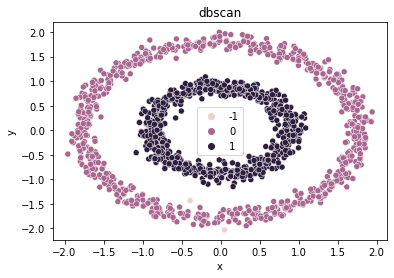

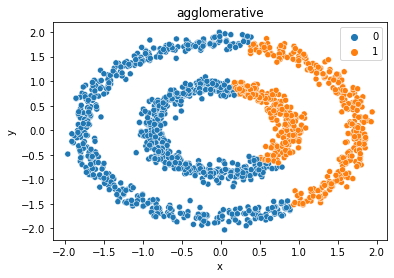

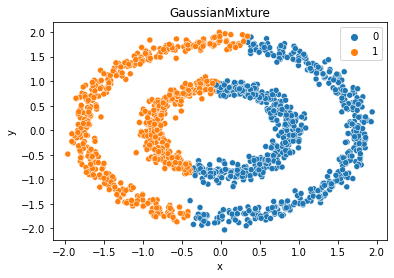

In [7]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(dataset1)
sns.scatterplot(x='x',y='y',data=dataset1,hue=kmeans.labels_)
plt.title('kmeans')

plt.figure()
dbscan=DBSCAN(eps=0.2)
dbscan.fit(dataset1)
sns.scatterplot(x='x',y='y',data=dataset1,hue=dbscan.labels_)
plt.title('dbscan')


plt.figure()
agg=AgglomerativeClustering()
agg.fit(dataset1)
sns.scatterplot(x='x',y='y',data=dataset1,hue=agg.labels_)
plt.title('agglomerative')


plt.figure()
GM=GaussianMixture(2,covariance_type='spherical',init_params='random',warm_start=True)
labels=GM.fit_predict(dataset1)
sns.scatterplot(x='x',y='y',data=dataset1,hue=labels)
plt.title('GaussianMixture')

In [8]:
s = silhouette_score(dataset1[['x', 'y']],kmeans.labels_, metric='euclidean')
print("the score of kmeans:",s)
s2 = silhouette_score(dataset1[['x', 'y']],dbscan.labels_, metric='euclidean')
print("the score of dbscane:",s2)
s3 = silhouette_score(dataset1[['x', 'y']],agg.labels_, metric='euclidean')
print("the score of hierch:",s3)
s4 = silhouette_score(dataset1[['x', 'y']],labels, metric='euclidean')
print("the score of hierch:",s4)

the score of kmeans: 0.35567933959644266
the score of dbscane: -0.024009897634762325
the score of hierch: 0.3211669561304396
the score of hierch: 0.348475899113805


the best algorithm here is dbscan as it clusterd the data into two correct clusters one inside the other

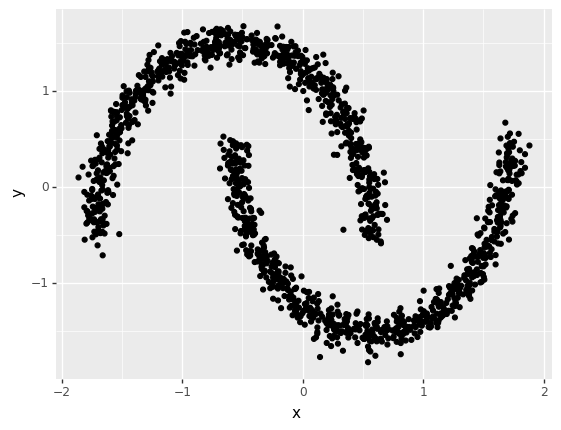

<ggplot: (173056693035)>

In [9]:
z = StandardScaler()
dataset2[["x","y"]] = z.fit_transform(dataset2)
ggplot(dataset2, aes(x = "x", y = "y")) + geom_point() 

Text(0.5, 1.0, 'GaussianMixture')

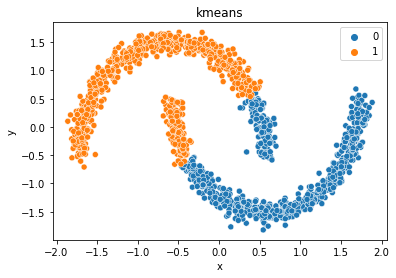

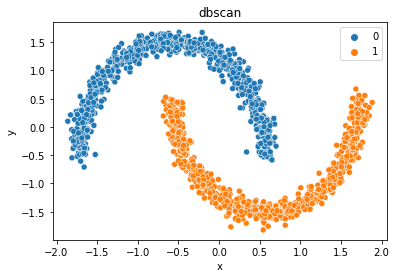

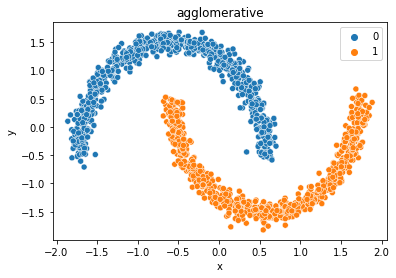

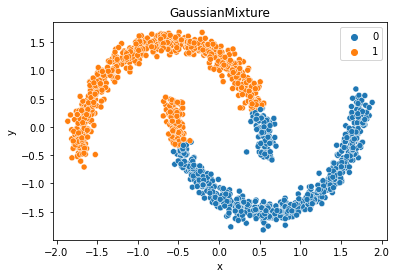

In [10]:
kmeans=KMeans(2)
kmeans.fit(dataset2)
sns.scatterplot(x='x',y='y',data=dataset2,hue=kmeans.labels_)
plt.title('kmeans')

plt.figure()
dbscan=DBSCAN()
dbscan.fit(dataset2)
sns.scatterplot(x='x',y='y',data=dataset2,hue=dbscan.labels_)
plt.title('dbscan')


plt.figure()
agg=AgglomerativeClustering(linkage='single')
agg.fit(dataset2)
sns.scatterplot(x='x',y='y',data=dataset2,hue=agg.labels_)
plt.title('agglomerative')


plt.figure()
GM=GaussianMixture(2,covariance_type='diag',n_init=10,init_params='random')
labels=GM.fit_predict(dataset2)
sns.scatterplot(x='x',y='y',data=dataset2,hue=labels)
plt.title('GaussianMixture')

In [11]:
s = silhouette_score(dataset2[['x', 'y']],kmeans.labels_, metric='euclidean')
print("the score of kmeans:",s)
s2 = silhouette_score(dataset2[['x', 'y']],dbscan.labels_, metric='euclidean')
print("the score of dbscane:",s2)
s3 = silhouette_score(dataset2[['x', 'y']],agg.labels_, metric='euclidean')
print("the score of hierch:",s3)
s4 = silhouette_score(dataset2[['x', 'y']],labels, metric='euclidean')
print("the score of hierch:",s4)

the score of kmeans: 0.4934285217512535
the score of dbscane: 0.39348381454814885
the score of hierch: 0.39348381454814885
the score of hierch: 0.4981478229149441


in this dataset both the dbscan and agglomerative outperform kmeans as it clustered the data into two correct clusters

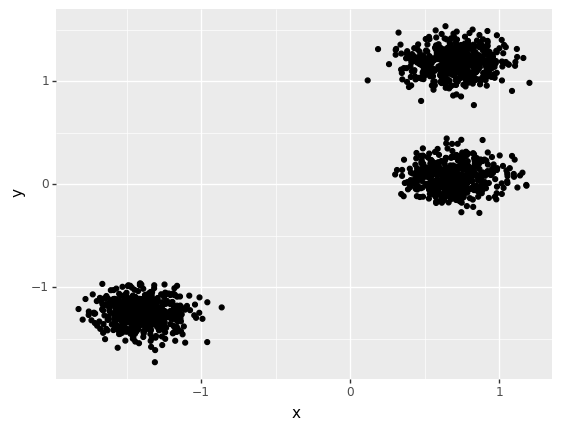

<ggplot: (173057717703)>

In [12]:
z = StandardScaler()
dataset3[["x","y"]] = z.fit_transform(dataset3)
ggplot(dataset3, aes(x = "x", y = "y")) + geom_point() 

Text(0.5, 1.0, 'GaussianMixture')

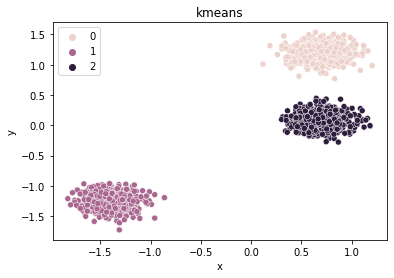

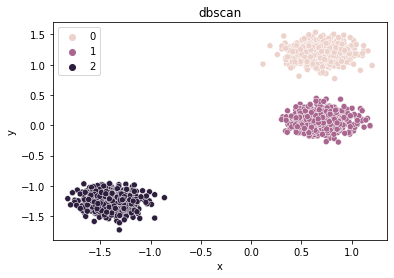

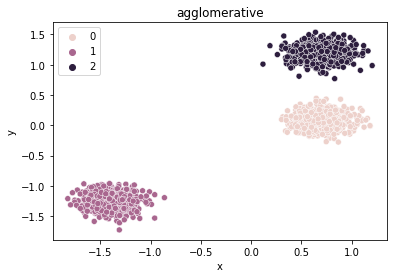

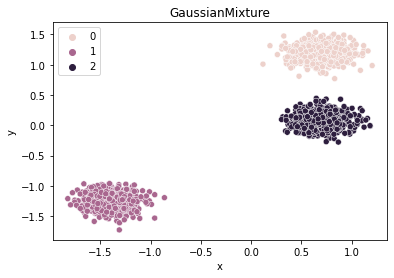

In [13]:
kmeans=KMeans(3)
kmeans.fit(dataset3)
sns.scatterplot(x='x',y='y',data=dataset3,hue=kmeans.labels_)
plt.title('kmeans')

plt.figure()
dbscan=DBSCAN(1.5)
dbscan.fit(dataset3)
sns.scatterplot(x='x',y='y',data=dataset3,hue=dbscan.labels_)
plt.title('dbscan')


plt.figure()
agg=AgglomerativeClustering(3)
agg.fit(dataset3)
sns.scatterplot(x='x',y='y',data=dataset3,hue=agg.labels_)
plt.title('agglomerative')


plt.figure()
GM=GaussianMixture(3)
labels=GM.fit_predict(dataset3)
sns.scatterplot(x='x',y='y',data=dataset3,hue=labels)
plt.title('GaussianMixture')

In [14]:
s = silhouette_score(dataset3[['x', 'y']],kmeans.labels_, metric='euclidean')
print("the score of kmeans:",s)
s2 = silhouette_score(dataset3[['x', 'y']],dbscan.labels_, metric='euclidean')
print("the score of dbscane:",s2)
s3 = silhouette_score(dataset3[['x', 'y']],agg.labels_, metric='euclidean')
print("the score of hierch:",s3)
s4 = silhouette_score(dataset3[['x', 'y']],labels, metric='euclidean')
print("the score of hierch:",s4)

the score of kmeans: 0.8104321767519068
the score of dbscane: 0.8104321767519068
the score of hierch: 0.8104321767519068
the score of hierch: 0.8104321767519068


all the four algorithms clustered the data correctly using the right parameters

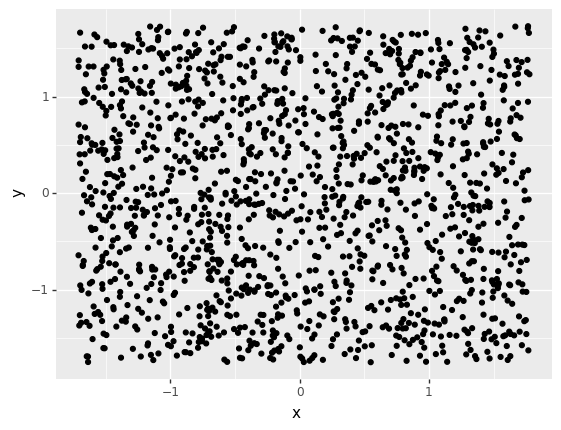

<ggplot: (173058880296)>

In [15]:
z = StandardScaler()
dataset4[["x","y"]] = z.fit_transform(dataset4)
ggplot(dataset4, aes(x = "x", y = "y")) + geom_point() 

D:\programs\PyCharm\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
D:\programs\PyCharm\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.


Text(0.5, 1.0, 'GaussianMixture')

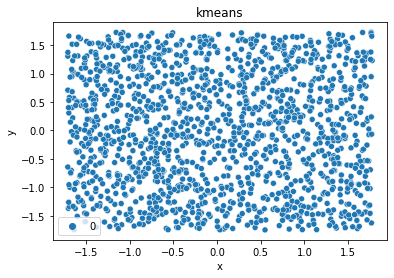

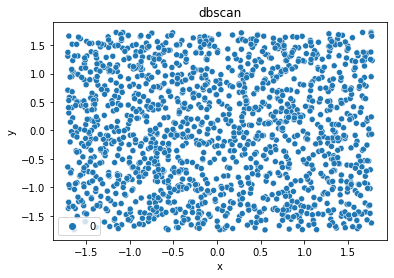

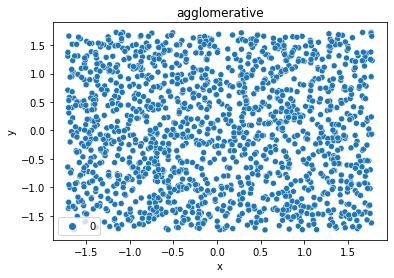

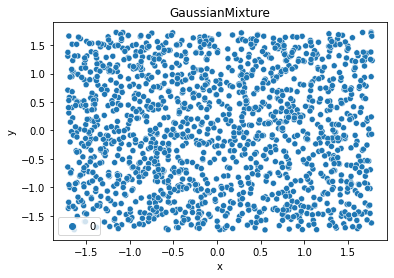

In [16]:
kmeans=KMeans(1)
kmeans.fit(dataset4)
sns.scatterplot(x='x',y='y',data=dataset4,hue=kmeans.labels_)
plt.title('kmeans')

plt.figure()
dbscan=DBSCAN()
dbscan.fit(dataset4)
sns.scatterplot(x='x',y='y',data=dataset4,hue=dbscan.labels_)
plt.title('dbscan')


plt.figure()
agg=AgglomerativeClustering(1)
agg.fit(dataset4)
sns.scatterplot(x='x',y='y',data=dataset4,hue=agg.labels_)
plt.title('agglomerative')

plt.figure()
GM=GaussianMixture()
labels=GM.fit_predict(dataset4)
sns.scatterplot(x='x',y='y',data=dataset4,hue=labels)
plt.title('GaussianMixture')

in this data the 3 algorithms correctly clusterd the data into 1 cluster

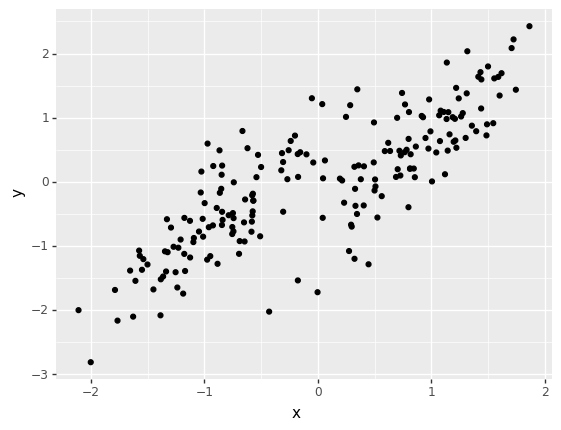

<ggplot: (173058986924)>

In [17]:
z = StandardScaler()
dataset5[["x","y"]] = z.fit_transform(dataset5)
ggplot(dataset5, aes(x = "x", y = "y")) + geom_point() 

Text(0.5, 1.0, 'GaussianMixture')

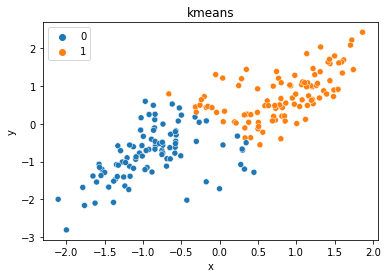

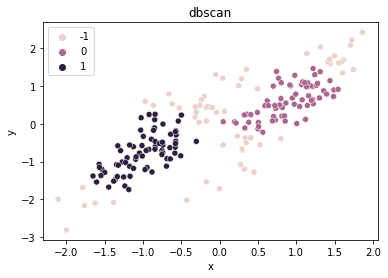

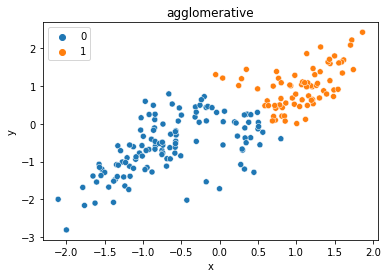

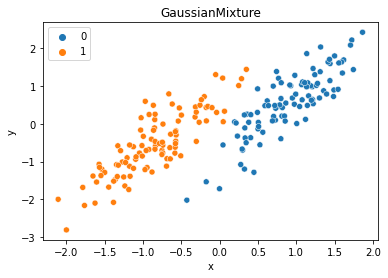

In [18]:
kmeans=KMeans(2)
kmeans.fit(dataset5)
sns.scatterplot(x='x',y='y',data=dataset5,hue=kmeans.labels_)
plt.title('kmeans')

plt.figure()
dbscan=DBSCAN(min_samples=15)
dbscan.fit(dataset5)
sns.scatterplot(x='x',y='y',data=dataset5,hue=dbscan.labels_)
plt.title('dbscan')


plt.figure()
agg=AgglomerativeClustering(2)
agg.fit(dataset5)
sns.scatterplot(x='x',y='y',data=dataset5,hue=agg.labels_)
plt.title('agglomerative')


plt.figure()
GM=GaussianMixture(2)
labels=GM.fit_predict(dataset5)
sns.scatterplot(x='x',y='y',data=dataset5,hue=labels)
plt.title('GaussianMixture')

the GaussianMixture algorithm is the best here as it correctly classified the data into to clusters

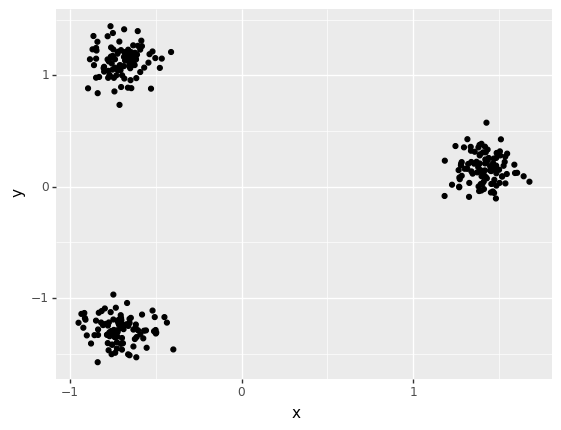

<ggplot: (173057552589)>

In [19]:
z = StandardScaler()
dataset7[["x","y"]] = z.fit_transform(dataset7)
ggplot(dataset7, aes(x = "x", y = "y")) + geom_point() 

Text(0.5, 1.0, 'GaussianMixture')

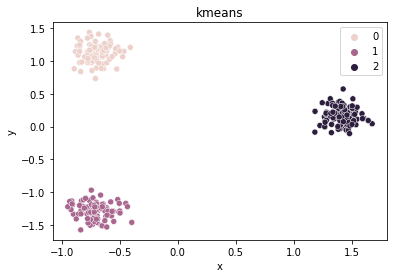

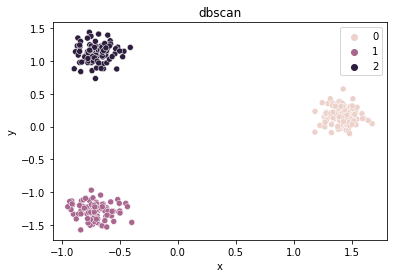

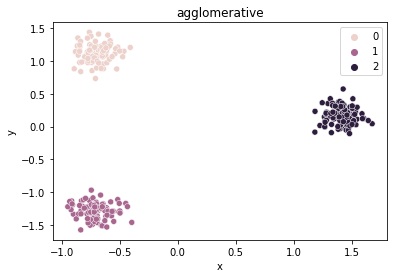

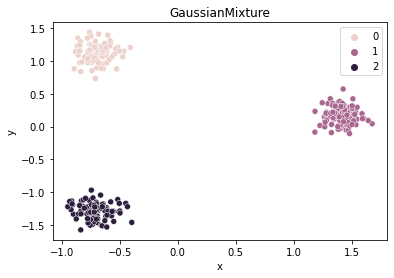

In [20]:
kmeans=KMeans(3)
kmeans.fit(dataset7)
sns.scatterplot(x='x',y='y',data=dataset7,hue=kmeans.labels_)
plt.title('kmeans')

plt.figure()
dbscan=DBSCAN()
dbscan.fit(dataset7)
sns.scatterplot(x='x',y='y',data=dataset7,hue=dbscan.labels_)
plt.title('dbscan')


plt.figure()
agg=AgglomerativeClustering(3)
agg.fit(dataset7)
sns.scatterplot(x='x',y='y',data=dataset7,hue=agg.labels_)
plt.title('agglomerative')


plt.figure()
GM=GaussianMixture(3)
labels=GM.fit_predict(dataset7)
sns.scatterplot(x='x',y='y',data=dataset7,hue=labels)
plt.title('GaussianMixture')

the four algorithms clustered the data correctly

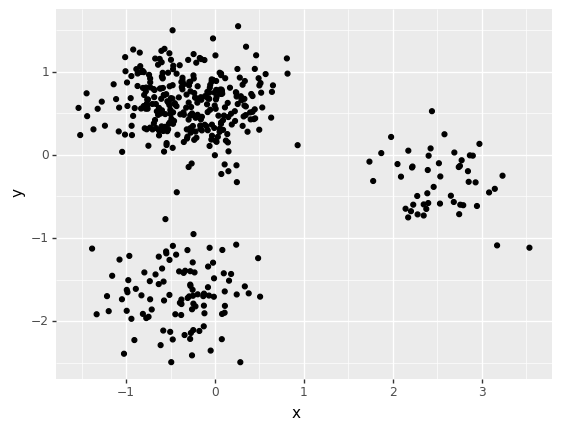

<ggplot: (173058792810)>

In [21]:
z = StandardScaler()
dataset8[["x","y"]] = z.fit_transform(dataset8)
ggplot(dataset8, aes(x = "x", y = "y")) + geom_point() 

Text(0.5, 1.0, 'agglomerative')

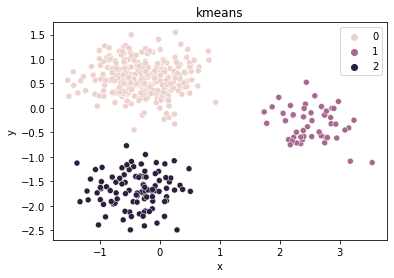

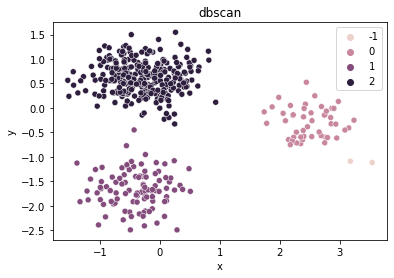

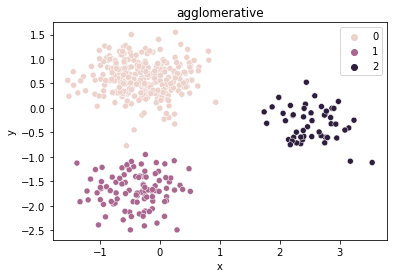

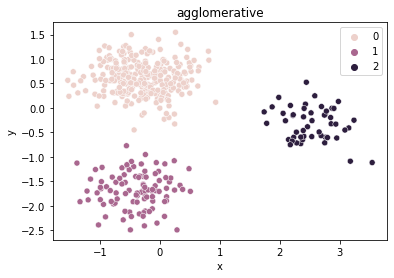

In [22]:
kmeans=KMeans(3)
kmeans.fit(dataset8)
sns.scatterplot(x='x',y='y',data=dataset8,hue=kmeans.labels_)
plt.title('kmeans')

plt.figure()
dbscan=DBSCAN()
dbscan.fit(dataset8)
sns.scatterplot(x='x',y='y',data=dataset8,hue=dbscan.labels_)
plt.title('dbscan')


plt.figure()
agg=AgglomerativeClustering(3)
agg.fit(dataset8)
sns.scatterplot(x='x',y='y',data=dataset8,hue=agg.labels_)
plt.title('agglomerative')


plt.figure()
GM=GaussianMixture(3)
labels=GM.fit_predict(dataset8)
sns.scatterplot(x='x',y='y',data=dataset8,hue=labels)
plt.title('agglomerative')

the four algorithms got very good results on this dataset, however the dbscan detected two points as outliers

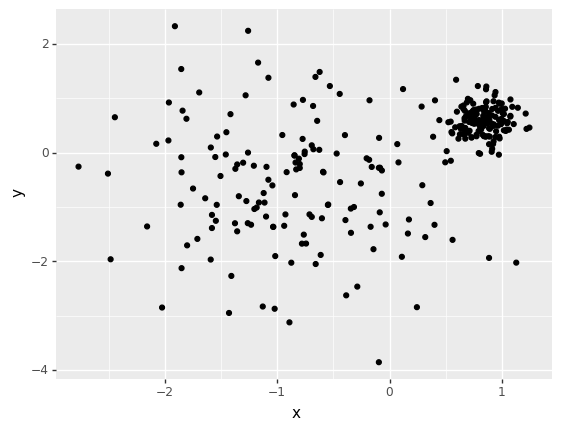

<ggplot: (173057516382)>

In [23]:
z = StandardScaler()
dataset9[["x","y"]] = z.fit_transform(dataset9)
ggplot(dataset9, aes(x = "x", y = "y")) + geom_point() 

Text(0.5, 1.0, 'GaussianMixture')

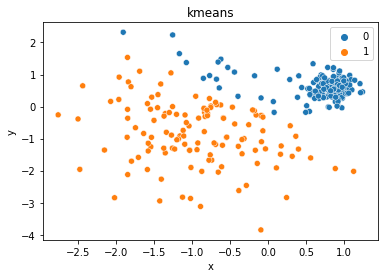

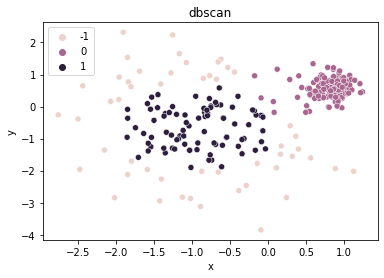

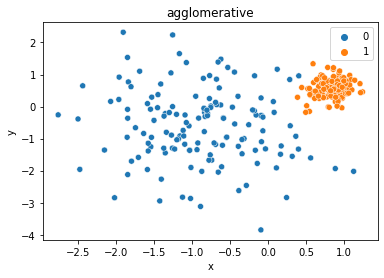

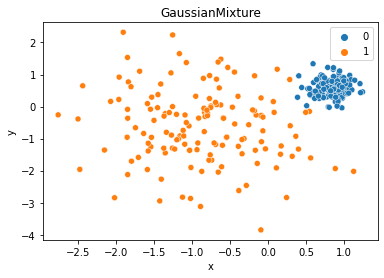

In [24]:
kmeans=KMeans(2)
kmeans.fit(dataset9)
sns.scatterplot(x='x',y='y',data=dataset9,hue=kmeans.labels_)
plt.title('kmeans')

plt.figure()
dbscan=DBSCAN(min_samples=15)
dbscan.fit(dataset9)
sns.scatterplot(x='x',y='y',data=dataset9,hue=dbscan.labels_)
plt.title('dbscan')


plt.figure()
agg=AgglomerativeClustering()
agg.fit(dataset9)
sns.scatterplot(x='x',y='y',data=dataset9,hue=agg.labels_)
plt.title('agglomerative')


plt.figure()
GM=GaussianMixture(2)
labels=GM.fit_predict(dataset9)
sns.scatterplot(x='x',y='y',data=dataset9,hue=labels)
plt.title('GaussianMixture')

the best algorithm here is the dbscan as it clustered the data into two clusters and detected the outliers due to high variance in data